# ML & DL Registration / Referral ID:AIRSS1190 Full Name: Mahesh Balaram Madhvi College Name: K.J.Somaiya College of Engineering

# Assignment 11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

%matplotlib inline

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

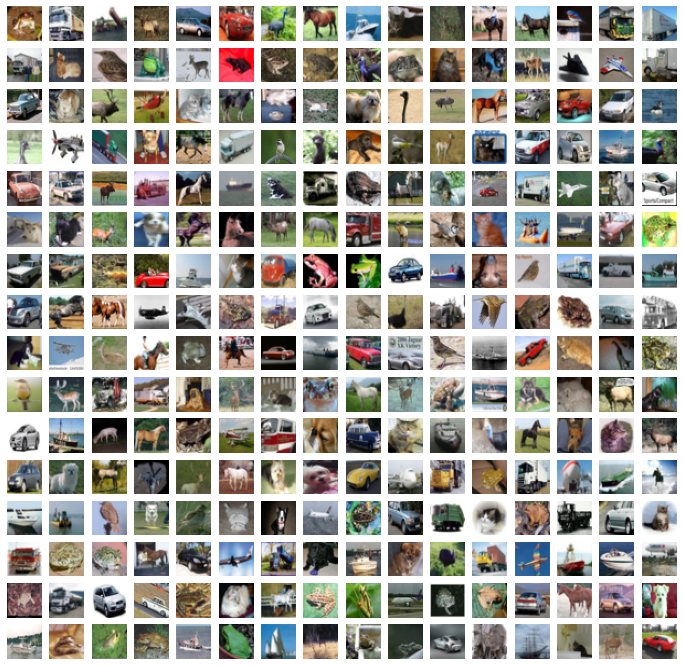

In [ ]:
plt.figure(figsize = (12,12))
for i in range(256):
  plt.subplot(16,16, 1+i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap = 'gray')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train,test_size = 0.2)

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)

In [ ]:
print(x_train.shape)
print(X_test.shape)
print(x_val.shape)
print(y_train.shape)
print(Y_test.shape)
print(y_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 10)
(10000, 1)
(10000, 10)


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg19.preprocess_input,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    horizontal_flip = True
)

val_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg19.preprocess_input)

train_datagen.fit(x_train)
val_datagen.fit(x_val)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 3,
                                            factor = 0.25,
                                            verbose = 1,
                                            min_lr = 0.00001)

In [ ]:
vgg_model = tf.keras.applications.VGG19(
    include_top = False,
    weights = 'imagenet',
    input_shape = (32,32,3)
)

vgg_model.summary()

80150528/80134624 [==============================] - 2s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [ ]:
model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 21,864,266
Trainable params: 21,864,266
Non-trainable params: 0
____________________________________________

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr = 0.001, momentum = 0.9)

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(
      train_datagen.flow(x_train, y_train, batch_size = 256),
      validation_data = val_datagen.flow(x_val,y_val, batch_size = 256),
      epochs = 30,
      verbose = 1,
      callbacks = [learning_rate_reduction]
)

Epoch 1/30
157/157 [==============================] - 80s 279ms/step - loss: 2.1767 - accuracy: 0.1701 - val_loss: 1.8062 - val_accuracy: 0.2861
Epoch 2/30
157/157 [==============================] - 42s 270ms/step - loss: 1.5004 - accuracy: 0.4225 - val_loss: 1.1194 - val_accuracy: 0.5858
Epoch 3/30
157/157 [==============================] - 42s 269ms/step - loss: 1.0161 - accuracy: 0.6389 - val_loss: 0.8694 - val_accuracy: 0.6984
Epoch 4/30
157/157 [==============================] - 42s 268ms/step - loss: 0.8296 - accuracy: 0.7145 - val_loss: 0.7651 - val_accuracy: 0.7409
Epoch 5/30
157/157 [==============================] - 42s 268ms/step - loss: 0.7272 - accuracy: 0.7498 - val_loss: 0.7016 - val_accuracy: 0.7655
Epoch 6/30
157/157 [==============================] - 42s 268ms/step - loss: 0.6531 - accuracy: 0.7750 - val_loss: 0.6290 - val_accuracy: 0.7898
Epoch 7/30
157/157 [==============================] - 42s 269ms/step - loss: 0.6126 - accuracy: 0.7892 - val_loss: 0.6030 - val_ac

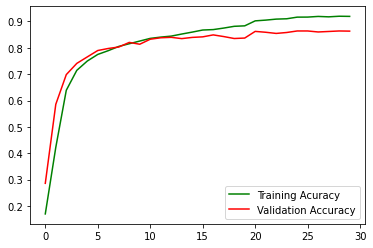

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

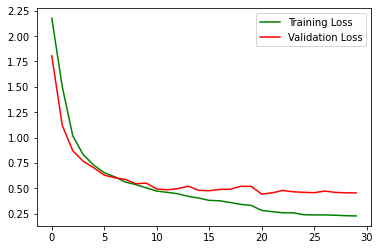

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [ ]:
x_test = tf.keras.applications.vgg19.preprocess_input(X_test)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1 )

In [ ]:
print(y_pred.shape)
print(Y_test.shape)

(10000,)
(10000, 1)


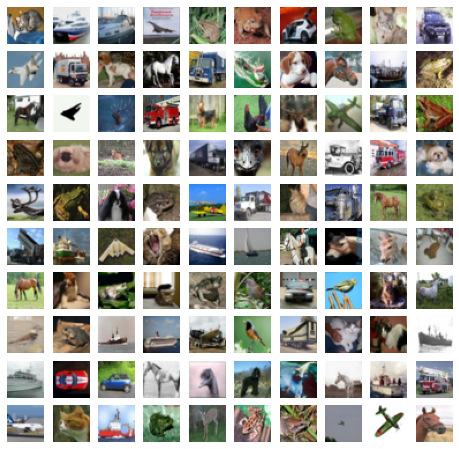

In [ ]:
plt.figure(figsize = (8,8))
for i in range(100):
  plt.subplot(10,10, 1+i)
  plt.axis('off')
  plt.imshow(X_test[i], cmap = 'gray')

In [ ]:
print(Y_test[:10])
print(y_pred[:10])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]
[3 8 8 0 6 6 1 6 3 1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Testing_accuracy: ', accuracy_score(Y_test, y_pred))

Testing_accuracy:  0.8634


In [ ]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[895,  12,  21,   4,   6,   1,   4,   8,  29,  20],
       [  6, 946,   1,   2,   0,   0,   1,   0,   3,  41],
       [ 27,   4, 832,  17,  36,  23,  42,  11,   4,   4],
       [ 13,   7,  33, 674,  31, 113,  77,  31,   7,  14],
       [  9,   1,  42,  13, 832,  10,  45,  44,   3,   1],
       [  3,   3,  19, 121,  25, 763,  23,  39,   0,   4],
       [  6,   4,  18,  19,  14,   5, 924,   1,   5,   4],
       [  7,   0,  12,  14,  20,  19,   5, 915,   1,   7],
       [ 34,  15,   4,   3,   0,   0,   1,   1, 925,  17],
       [ 11,  40,   1,   4,   1,   0,   3,   2,  10, 928]])

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


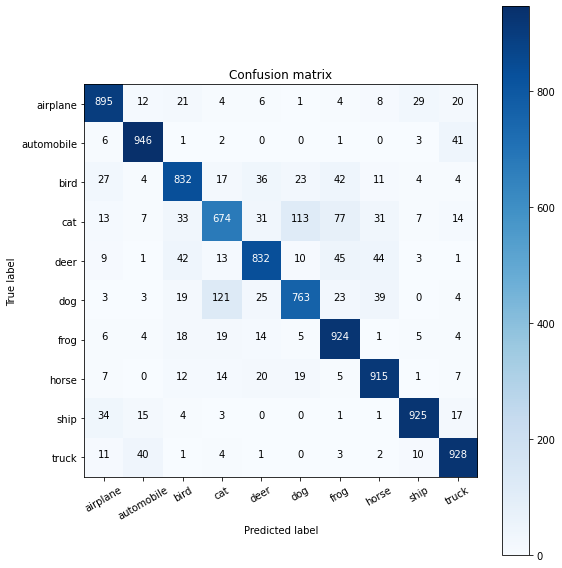

In [ ]:
plt.figure(figsize = (8,8))
plot_confusion_matrix(cm, classes)